In [1]:
from math import sin, pow, cos, sqrt
import matplotlib.pyplot as plt
import numpy as np

class optimizer():
    def __init__(self, method = 'gd', initial_point = -5, lr = 0.01):
        self.b1 = 0.88
        self.b2 = 0.88
        self.epsilon = 0.000001
        self.grad_list = []
        self.graph_range = [-6, 6]
        self.it = 0
        self.lr = lr
        self.max_iter = 200
        self.method = method
        self.momentum = [0]
        self.output = []
        self.output.append(self.eval_function(initial_point))
        self.points = []
        self.points.append(initial_point)
        self.stop_var = 0.0001
        self.variance = [0]
        
    def optimized_function(self, x):
        '''
        function to optimize
        params:
        x: a number to be evaluated
        returns:
        y: x evaluated at the function
        '''
        y = 0.1 * pow(x, 4) -  pow(x, 2) + 10 * sin(2 * x)
        return y 

    
    def derivative(self, x):
        '''
        derivative of the function to optimize
        params:
        x: a number to be evaluated at the derivativ
        returns:
        y: x evaluated at the derivative 

        '''
        der = 0.4 * pow(x , 3) - 2*x + 20 * cos(2 * x)
        return der
    
    def last_point(self):
        ''' 
        return the last x point
        '''
        return self.points[-1]
    
    def last_momentum(self):
        ''' 
        return the last momentum value
        '''
        return self.momentum[-1]
    
    def last_variance(self):
        ''' 
        return the last momentum value
        '''
        return self.variance[-1]
    
    def eval_function(self, x):
        ''' 
        eval the function to be optimize and update the output list of object
        '''
        y = self.optimized_function(x)
        return y

    def delta(self):
        ''' 
        calculate the delta to be added to update x according to the method used
        '''
        x = self.last_point()
        derivative = self.derivative(x)
        if self.method == 'gd':
            delta = self.lr * self.derivative
        if self.method == 'momentum':
            momentum = self.b1 * self.last_momentum() + (1 - self.b1) * derivative
            self.momentum.append(momentum)
            delta = self.lr * momentum
        if self.method == 'rms_prop':
            variance = derivative * derivative
            momentum = self.b1 * self.last_momentum() + (1 - self.b1) * variance
            delta = self.lr * derivative/(sqrt(momentum) + self.epsilon)
            self.momentum.append(momentum)
        
        if self.method == 'adam':
            variance = derivative * derivative
            momentum = self.b1 * self.last_momentum() + (1 - self.b1) * derivative
            variance = self.b2 * self.last_variance() + (1 - self.b2) * variance
            momentum = momentum/(1 - pow(self.b1, self.it + 1))
            variance = variance/(1 - pow(self.b2, self.it + 1))
            self.momentum.append(momentum)
            self.variance.append(variance)


            delta = self.lr * momentum/(sqrt(variance) + self.epsilon)


        return delta
    
    def step_forward(self):
        ''' 
        update x according t
        '''
        x = self.last_point()
        x -= self.delta()
        self.points.append(x)
        y = self.eval_function(x)
        self.output.append(y)
        
    def optimize(self):
        ''' 
        run max_iter number of steps forward
        '''
        self.it = 0
        while self.it < self.max_iter:
            self.step_forward()
            self.it += 1
            
        optimal = self.output[-1]
        x_optimal = self.last_point()
        print(x_optimal, optimal)
        return x_optimal, optimal
    
    def graph_evaluated(self):
        ''' 
        graph the function from the initial point to the point reached through the iterations
        '''
        plt.figure(figsize=(10, 6))
        plt.plot(self.points, self.output, marker='o') 
        plt.show()   

    def graph_function(self):
        ''' 
        graph the function in the range established in self.graph_range
        '''
        plt.figure(figsize=(10, 6))
        xs = np.linspace(self.graph_range[0], self.graph_range[1], 100)
        y = [self.eval_function(x) for x in xs]
        plt.plot(xs, y, marker='o') 
        plt.show()  




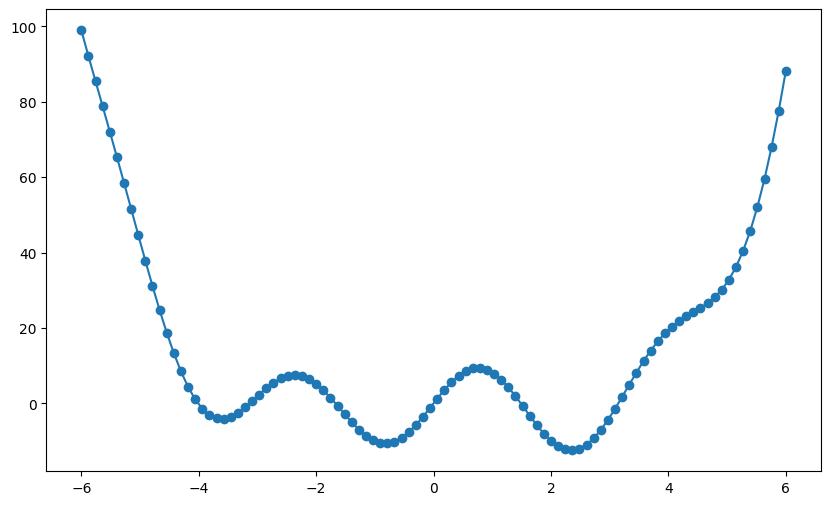

In [2]:
optimizer_1 = optimizer(method = 'momentum')
optimizer_1.graph_function()

-3.6154072482407944 -4.1059637721211715


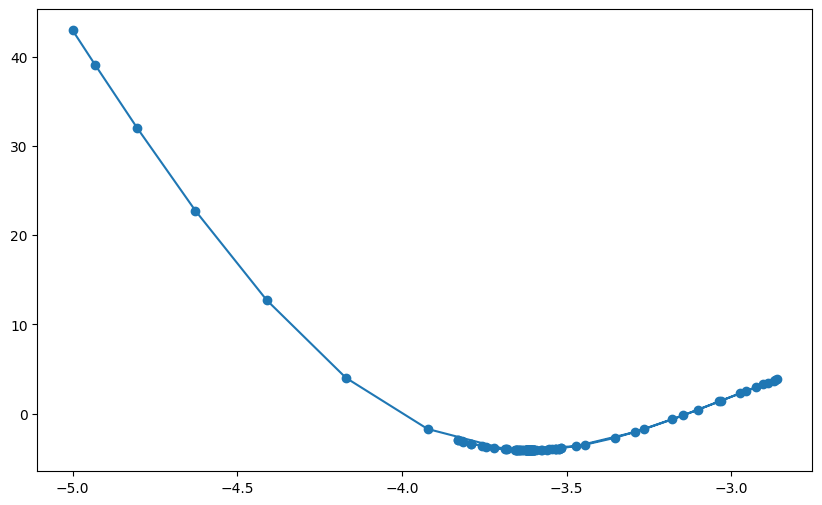

In [3]:
optimizer_1.optimize()
optimizer_1.graph_evaluated()